<a href="https://colab.research.google.com/github/alysonfumagalli/projeto-spoesta/blob/feat%2Fsrag/srag_probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **Importar biblioteca pandas** { vertical-output: true, form-width: "60%" }

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
def exibir_texto(texto: str):
  display_text = f"<h3>{texto}</h3>"
  display(HTML(display_text))

## Importar arquivos CSV

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv(
    '/content/drive/MyDrive/COLAB-DATASETS/SPOESTAT/INFLUD21-01-05-2023.csv',
    sep=';',
    encoding='utf-8'
)

Mounted at /content/drive/


/tmp/ipython-input-3-2041925078.py:4: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


# Análise e Investigação dos Dados

## Reduzindo quantidade de dados

- Com objetivo de otimizar o tempo de resposta vamos reduzir a quantidade de dados análisados

In [4]:
df.shape # Quantidade de linhas e colunas

(1731290, 166)

In [5]:
# Reduzir o conjunto de dados à 100.000 para melhorar a velocidade da análise
# df.to_csv('sample_data.csv', index=False) # Para salvar os dados reduzidos
df = df.sample(n=100000, random_state=42)

## Verificando as colunas do DataFrame

In [6]:
# O que analisar nas 100 variaveis e dicas: https://chatgpt.com/c/68520906-74c4-800f-8e68-82defe5625d0


# df.head() -> Exibir primeiros 10 dados
# Checklist
# [ ] Separar variáveis a serem estudadas
#     - Usar DataFrame.info() para analisar as colunas e tipos
#     - Usar DataFrame.describe() para estatisticas basicas
#     - Usar DataFrame.isnull().sum() para quantidade de valores nulos
#     - Avalie se colunas com muitos valores faltantes — essas podem ser descartadas ou tratadas.

In [7]:
df.describe()

,SEM_NOT,SEM_PRI,CO_REGIONA,CO_MUN_NOT,CO_UNI_NOT,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,...,AN_ADENO,AN_OUTRO,TP_AM_SOR,TP_SOR,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,FNT_IN_COV
count,100000.000000,100000.00000,88467.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,64994.000000,...,2.0,45.0,7984.000000,7020.000000,12054.000000,12228.000000,9119.000000,73546.000000,74513.000000,74542.000000
mean,20.332280,19.55062,1553.375473,342004.450020,3.302318e+06,53.425470,2.965900,5.782500,3.51259,5.352494,...,1.0,1.0,2.292335,1.366809,2.768790,2.716798,4.031582,1.992807,3.227303,1.197553
std,12.059208,12.49537,623.826474,89155.140577,2.406845e+06,22.393637,0.200842,0.880137,2.83404,3.463432,...,0.0,0.0,2.791868,0.904349,1.532648,1.530644,1.154110,0.084505,3.098902,0.398156
min,1.000000,1.00000,1331.000000,110001.000000,1.900000e+01,0.000000,1.000000,0.000000,1.00000,0.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11.000000,10.00000,1348.000000,310620.000000,2.083264e+06,40.000000,3.000000,5.000000,1.00000,2.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000
50%,19.000000,17.00000,1449.000000,351380.000000,2.482339e+06,56.000000,3.000000,6.000000,4.00000,4.000000,...,1.0,1.0,1.000000,1.000000,4.000000,2.000000,4.000000,2.000000,2.000000,1.000000
75%,27.000000,26.00000,1522.000000,410480.000000,3.718395e+06,70.000000,3.000000,6.000000,4.00000,9.000000,...,1.0,1.0,2.000000,1.000000,4.000000,4.000000,4.000000,2.000000,2.000000,1.000000
max,52.000000,52.00000,6256.000000,530010.000000,9.997091e+06,118.000000,3.000000,9.000000,9.00000,9.000000,...,1.0,1.0,9.000000,4.000000,9.000000,9.000000,9.000000,2.000000,9.000000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 290935 to 1273936
Columns: 166 entries, DT_NOTIFIC to FNT_IN_COV
dtypes: float64(89), int64(11), object(66)
memory usage: 127.4+ MB


## Probabilidade simples

### Probabilidades baseadas na coluna "HOSPITAL" ou "Houve Internação"

Possíveis valores da coluna HOSPITAL antes da limpeza: 
HOSPITAL
1.0    95396
NaN     2611
2.0     1824
9.0      169
Name: count, dtype: int64
Valores possíveis da coluna HOSPITAL após a limpeza
HOSPITAL
1.0    95396
2.0     1824
9.0      169
Name: count, dtype: int64


/tmp/ipython-input-10-2386953170.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


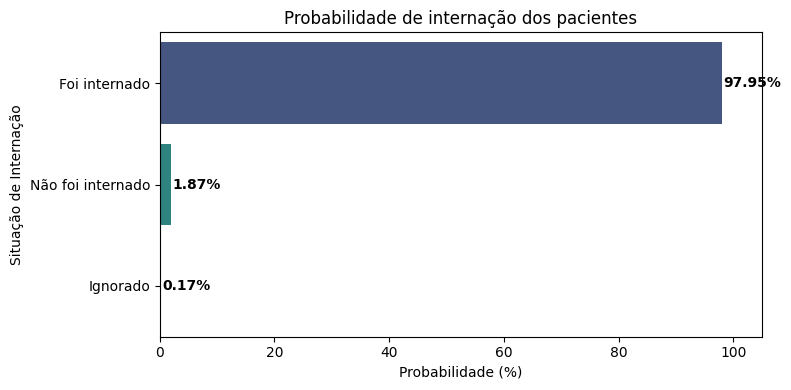

In [10]:
# 1ª Etapa: Limpar os dados para que eles não sejam enviesados

# Exploração inicial dos dados
print("Possíveis valores da coluna HOSPITAL antes da limpeza: ")
print(df['HOSPITAL'].value_counts(dropna=False))

# Limpeza dos dados após identificar que possuímos valores nulos
valores_validos = [1, 2, 9]
df_hospital_not_null = df[df['HOSPITAL'].notnull()]
df_hospital_validos = df_hospital_not_null[df_hospital_not_null['HOSPITAL'].isin(valores_validos)]

# Note que após a limpeza restou apenas registros válidos, ou seja, que estão dentre as opções descritas do dicionário de dados
print("Valores possíveis da coluna HOSPITAL após a limpeza")
print(df_hospital_validos['HOSPITAL'].value_counts())

# Descrição das opções da coluna HOSPITAL
map_hospital_col = {
    1: 'Foi internado',
    2: 'Não foi internado',
    9: 'Ignorado'
}

df_hospital_validos['HOSPITAL_DESC'] = df_hospital_validos['HOSPITAL'].map(map_hospital_col)


# Cálcular a quantidade total de dados para estimar a probabilidade de cada opção da coluna HOSPITAL
df_hospital_validos_total = len(df_hospital_validos)

## Coletando a frequência relativa de cada opção e multiplicando por 100 para obter o percentual
df_hospital_probabilidades = df_hospital_validos['HOSPITAL_DESC'].value_counts(normalize=True) * 100
df_hospital_probabilidades.sort_values(ascending=True)

# Utilizar o sns.barplot para montar um gráfico de barras, na onde o X será o percentual, e y as opções possíveis (Descritas através do map feito)
plt.figure(figsize=(8, 4))
sns.barplot(
    x=df_hospital_probabilidades.values,
    y=df_hospital_probabilidades.index,
    palette="viridis"
)

for i, v in enumerate(df_hospital_probabilidades.values):
    plt.text(v + 0.3, i, f"{v:.2f}%", va='center', fontweight='bold')

plt.title("Probabilidade de internação dos pacientes")
plt.xlabel("Probabilidade (%)")
plt.ylabel("Situação de Internação")
plt.xlim(0, 105)
plt.tight_layout()
plt.show()

### Probabilidades baseadas na coluna EVOLUCAO ou "Evolução do caso"

Possíveis valores da coluna QUADRO antes da limpeza: 
EVOLUCAO
1.0    61957
2.0    25069
NaN     9082
9.0     2521
3.0     1371
Name: count, dtype: int64
Valores possíveis da coluna EVOLUCAO após a limpeza
EVOLUCAO
1.0    61957
2.0    25069
9.0     2521
3.0     1371
Name: count, dtype: int64


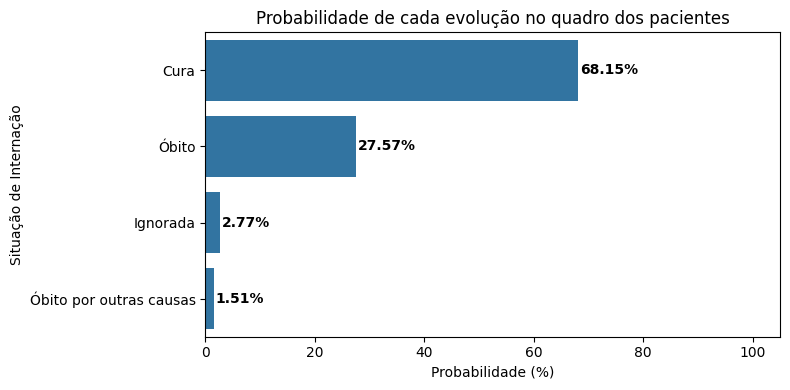

In [11]:
# 1ª Etapa: Limpar os dados para que eles não sejam enviesados

# Exploração inicial dos dados
print("Possíveis valores da coluna QUADRO antes da limpeza: ")
print(df['EVOLUCAO'].value_counts(dropna=False))

# Limpeza dos dados após identificar que possuímos valores nulos
valores_validos = [1, 2, 3, 9]
df_evolucao_not_null = df[df['EVOLUCAO'].notnull()]
df_evolucao_validos = df_evolucao_not_null[df_evolucao_not_null['EVOLUCAO'].isin(valores_validos)]

# Note que após a limpeza restou apenas registros válidos, ou seja, que estão dentre as opções descritas do dicionário de dados
print("Valores possíveis da coluna EVOLUCAO após a limpeza")
print(df_evolucao_validos['EVOLUCAO'].value_counts())

# Descrição das opções da coluna EVOLUCAO
map_evolucao_col = {
    1: 'Cura',
    2: 'Óbito',
    3: 'Óbito por outras causas',
    9: 'Ignorada'
}

df_evolucao_validos['EVOLUCAO_DESC'] = df_evolucao_validos['EVOLUCAO'].map(map_evolucao_col)


# Cálcular a quantidade total de dados válidos, que representará nosso espaço amostral, com objetivo de estimar a probabilidade de cada opção da coluna EVOLUCAO
df_evolucao_validos_total = len(df_evolucao_validos)

## Coletando a frequência relativa de cada opção e multiplicando por 100 para obter o percentual
df_evolucao_probabilidades = df_evolucao_validos['EVOLUCAO_DESC'].value_counts(normalize=True) * 100
df_evolucao_probabilidades.sort_values(ascending=True)

# Utilizar o sns.barplot para montar um gráfico de barras, na onde o X será o percentual, e y as opções possíveis (Descritas através do map feito)
plt.figure(figsize=(8, 4))
sns.barplot(
    x=df_evolucao_probabilidades.values,
    y=df_evolucao_probabilidades.index
)

for i, v in enumerate(df_evolucao_probabilidades.values):
    plt.text(v + 0.3, i, f"{v:.2f}%", va='center', fontweight='bold')

plt.title("Probabilidade de cada evolução no quadro dos pacientes")
plt.xlabel("Probabilidade (%)")
plt.ylabel("Situação de Internação")
plt.xlim(0, 105)
plt.tight_layout()
plt.show()

### Conclusões

A análise combinada das colunas HOSPITAL e EVOLUCAO revela que a base de dados é composta, majoritariamente, por pacientes internados (97,55%). Esse dado evidencia um viés de gravidade clínica, indicando que a amostra de fato se concentra em casos moderados a graves de síndrome respiratória aguda (SRAG).

Entre os registros com evolução clínica preenchida (aproximadamente 91 mil), observou-se que 67,03% evoluíram para cura, enquanto 27,3% resultaram em óbito (por SRAG ou outras causas). Esses valores reforçam o perfil crítico da base analisada, mas também demonstram uma boa taxa de recuperação entre os pacientes atendidos em 2021.

A qualidade estatística da base pode ser considerada razoável, uma vez que há baixa quantidade de dados ignorados ou ausentes nas colunas analisadas. No entanto, recomenda-se cuidado ao extrapolar os resultados para a população geral, uma vez que o conjunto de dados tende a representar casos mais graves e hospitalizados, não refletindo toda a gama de manifestações clínicas da SRAG.

Vale destacar que a alta taxa de pacientes internados não representa, necessariamente, uma falha no conjunto de dados, mas sim uma característica comum e esperada na definição clínica do próprio SRAG, que é focada em casos mais graves. Como consequência, o alto número de internações indica uma fidelidade intencional às condições propostas pelo base de dados, e não apenas um viés de seleção amostral conforme analisado.

## Probabilidade Condicional e Teorema de Bayes

### Probabilidade Condicional baseada na coluna "HOSPITAL" e "EVOLUÇÂO"

#### 1º Etapa: Limpeza dos dados

- Novamente, para realizarmos uma análise dessas colunas, precisamos primeiro entender o tipo de dados delas.
- A coluna HOSPITAL no Dicionário de dados é uma variável categórica composta pelos valores: 1 (Internado), 2 (Não internado) e 3 (Ignorado).
- A coluna EVOLUCAO no Dicionário de Dados é uma variável categórica composta pelos valores: 1 (Cura), 2 (Óbito), 3 (Óbito por outras causas) e 9 (Ignorado).


In [12]:
exibir_texto("Possíveis valores da coluna HOSPITAL e EVOLUCAO antes da limpeza: ")
display(df['HOSPITAL'].value_counts(dropna=False))
display(df['EVOLUCAO'].value_counts(dropna=False))


# Limpeza da coluna evolução e hospital
valores_validos_evolucao = [1, 2, 3, 9]
valores_validos_hospital = [1, 2, 3]
df_evolucao_hospital_not_null = df[(df['EVOLUCAO'].notnull() & df['HOSPITAL'].notnull())]
df_evolucao_hospital_validos = df_evolucao_hospital_not_null[
    (
        df_evolucao_hospital_not_null['EVOLUCAO'].isin(valores_validos_evolucao)
          &
        df_evolucao_hospital_not_null['HOSPITAL'].isin(valores_validos_hospital)
    )
  ]

exibir_texto(f"Quantidade de registros após a limpeza: {len(df_evolucao_hospital_validos)}")

,count
HOSPITAL,
1.0,95396
NaN,2611
2.0,1824
9.0,169


,count
EVOLUCAO,
1.0,61957
2.0,25069
NaN,9082
9.0,2521
3.0,1371


#### 2º Etapa: Descrição dos dados

In [13]:
df_evolucao_hospital_validos['EVOLUCAO_DESC'] = df_evolucao_hospital_validos['EVOLUCAO'].map(map_evolucao_col)
df_evolucao_hospital_validos['HOSPITAL_DESC'] = df_evolucao_hospital_validos['HOSPITAL'].map(map_hospital_col)

#### 3º Etapa: Análise dos dados

- Pergunta 1: Qual a probabilidade de óbito dado que o paciente foi internado?
- Pergunta 2: Qual a probabilidade de cura dado que o paciente foi internado?
- Pergunta 4: Qual a probabilidade de internação dado que o paciente evoluiu para óbito?
- Pergunta 5: Qual a probabilidade de cura dado que o paciente não foi internado?
- Pergunta 6: Qual a probabilidade de cura dado que o paciente foi internado?
- Todas essas perguntas podem ser respondidas através de uma análise utilizando a probabilidade condicional, para vamos aplicar a fórmula P(A | B) = P (A ∩ B) / P (B)

In [14]:
def adicionar_probabilidade_acima_barra(bars, ax):
  for bar in bars:
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}%',
                  ha='center', va='bottom', fontsize=10)

def criar_grafico_probabilidade(ax, indexes, values, title, x_label, criar_probabilidade):
  bar = ax.bar(indexes, values)
  ax.set_title(title)
  ax.set_ylabel('Percentual')
  ax.set_xlabel(x_label)
  ax.tick_params(axis='x', rotation=45)
  if criar_probabilidade: adicionar_probabilidade_acima_barra(bar, ax)

  return bar

##### Etapa 3.1: Probabilidade do condicionante

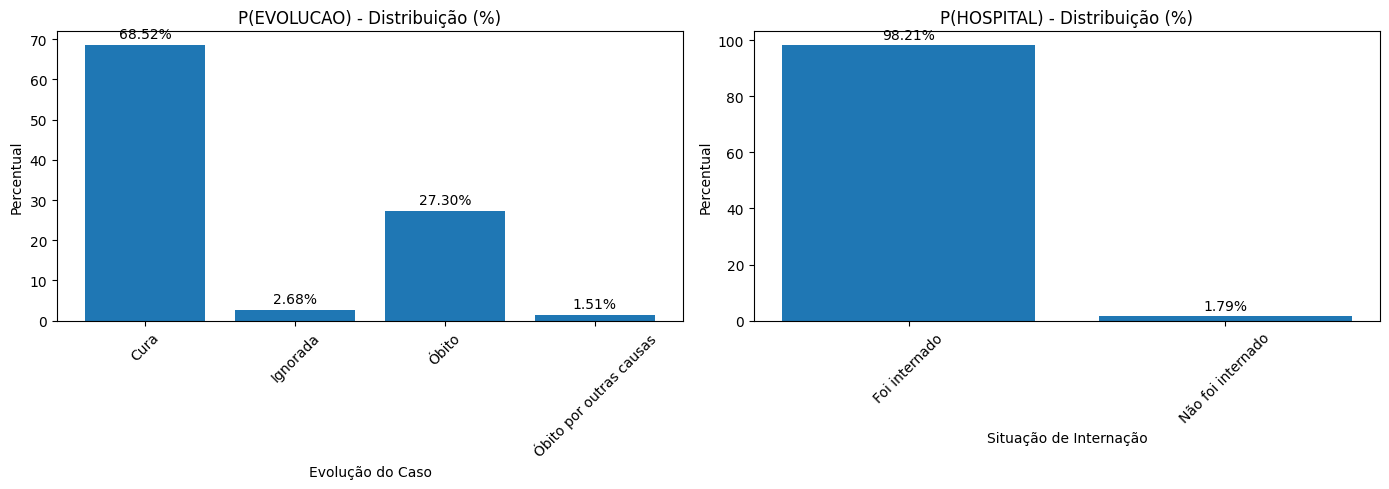

In [15]:
## Inicialmente precisamos calcular a probabilidade a priori da EVOLUÇÃO
## Nesse primeiro groupby conseguimos obter a frequência absoluta de cada valor possível de evolução e dividimos isso pela quantidade de valores válidos no dataset "recortado".
## Em resumo estamos calculando P(B) para cada valor possível de B
prob_evolucao = (
    df_evolucao_hospital_validos
    .groupby('EVOLUCAO_DESC')
    .size()
    .div(len(df_evolucao_hospital_validos))
    .rename('P(EVOLUCAO)')
)
prob_hospital = (
    df_evolucao_hospital_validos
    .groupby('HOSPITAL_DESC')
    .size()
    .div(len(df_evolucao_hospital_validos))
    .rename('P(HOSPITAL)')
)

# Exibição gráfica das probabilidades
prob_evolucao_percent = (
    prob_evolucao
    .mul(100)
    .round(2)
)
prob_hospital_percent = (
    prob_hospital
    .mul(100)
    .round(2)
)

# Criar os gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
idx_evolucao = 0
idx_hospital = 1

# Gráfico 1: Evolução
bars1 = criar_grafico_probabilidade(
    axs[idx_evolucao],
    prob_evolucao_percent.index,
    prob_evolucao_percent.values,
    'P(EVOLUCAO) - Distribuição (%)',
    'Evolução do Caso',
    True
)
# Gráfico 2: Hospital
bars2 = criar_grafico_probabilidade(
    axs[idx_hospital],
    prob_hospital_percent.index,
    prob_hospital_percent.values,
    'P(HOSPITAL) - Distribuição (%)',
    'Situação de Internação',
    True
)

plt.tight_layout()
plt.show()

##### Etapa 3.2: Probabilidade conjunta

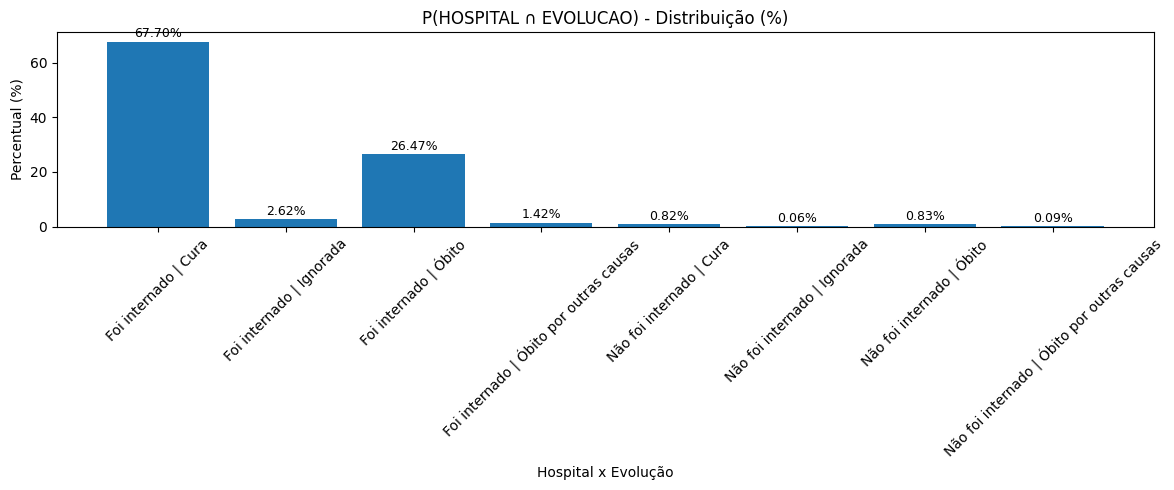

In [16]:
## O primeiro groupby conseguimos obter a frequência absoluta de cada combinação de HOSPITAL e EVOLUCAO
## Com essa frequência absoluta obtemos a probabilidade de cada combinação e depois dividimos pela probabilidade de b calculada anteriormente.
## Em resumo, estamos calculando P(A ∩ B) para cada valor possível de A e B.
exibir_texto("Probabilidade conjunta: P(HOSPITAL ∩ EVOLUCAO) ou P(EVOLUCAO ∩ HOSPITAL):")
prob_hospital_e_evolucao = (
      df_evolucao_hospital_validos
      .groupby(['HOSPITAL_DESC', 'EVOLUCAO_DESC'])
      .size()
      .div(len(df_evolucao_hospital_validos))
      .rename('P(HOSPITAL ∩ EVOLUCAO)')
)
prob_hospital_e_evolucao_percent = prob_hospital_e_evolucao.mul(100).round(2)
index_formatado = [f'{hosp} | {evol}' for hosp, evol in prob_hospital_e_evolucao_percent.index]

fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(index_formatado, prob_hospital_e_evolucao_percent.values)

# Título e eixos
ax.set_title('P(HOSPITAL ∩ EVOLUCAO) - Distribuição (%)')
ax.set_ylabel('Percentual (%)')
ax.set_xlabel('Hospital x Evolução')
ax.tick_params(axis='x', rotation=45)

# Adicionar rótulos em cima das barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Plotar gráfico
plt.tight_layout()
plt.show()

##### Etapa 3.3: Probabilidade condicional (P(HOSPITAL | EVOLUCAO))

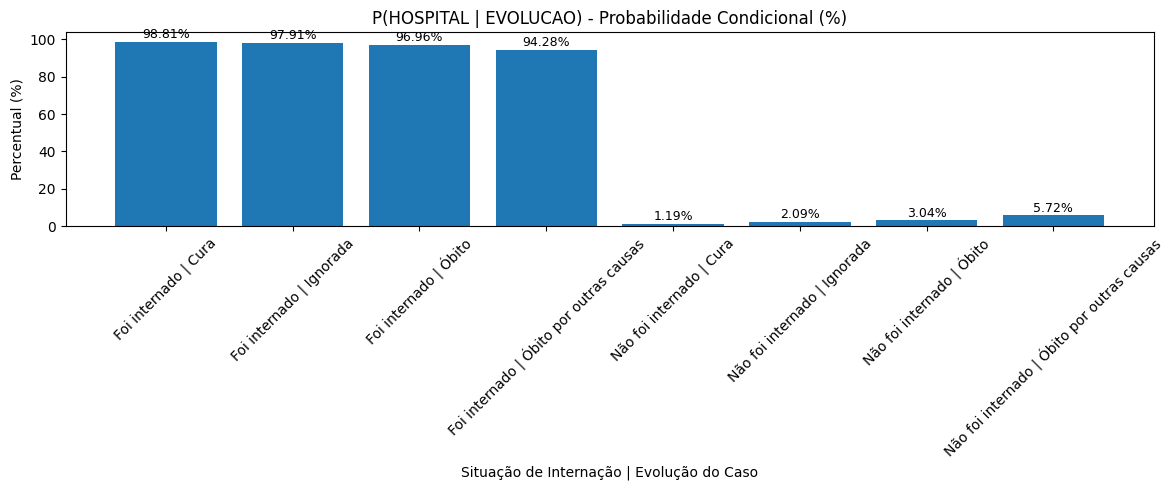

In [17]:
## Com esses dois últimos cálculos, podemos encontrar todas as probabilidades de A (HOSPITAL), tal que B (EVOLUCAO)
prob_hospital_tal_evolucao = pd.merge(prob_hospital_e_evolucao.reset_index(), prob_evolucao.reset_index(), on='EVOLUCAO_DESC')
prob_hospital_tal_evolucao['P(HOSPITAL | EVOLUCAO)'] = (
    prob_hospital_tal_evolucao['P(HOSPITAL ∩ EVOLUCAO)'] / prob_hospital_tal_evolucao['P(EVOLUCAO)']
)
prob_hospital_tal_evolucao['P(HOSPITAL | EVOLUCAO)'] = (prob_hospital_tal_evolucao['P(HOSPITAL | EVOLUCAO)'] * 100).round(2).astype(str) + '%'
# Preparar os dados numéricos (sem % string)
prob_hospital_tal_evolucao['P_NUM'] = pd.to_numeric(
    prob_hospital_tal_evolucao['P(HOSPITAL | EVOLUCAO)'].str.replace('%', '')
)


# Criar categorias compostas para o eixo X
x_labels = [
    f'{hosp} | {evol}'
    for hosp, evol in zip(prob_hospital_tal_evolucao['HOSPITAL_DESC'], prob_hospital_tal_evolucao['EVOLUCAO_DESC'])
]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(x_labels, prob_hospital_tal_evolucao['P_NUM'])

# Título e eixos
ax.set_title('P(HOSPITAL | EVOLUCAO) - Probabilidade Condicional (%)')
ax.set_ylabel('Percentual (%)')
ax.set_xlabel('Situação de Internação | Evolução do Caso')
ax.tick_params(axis='x', rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

##### Etapa 3.4 Probabilidade condicional P(EVOLUCAO | HOSPITAL)

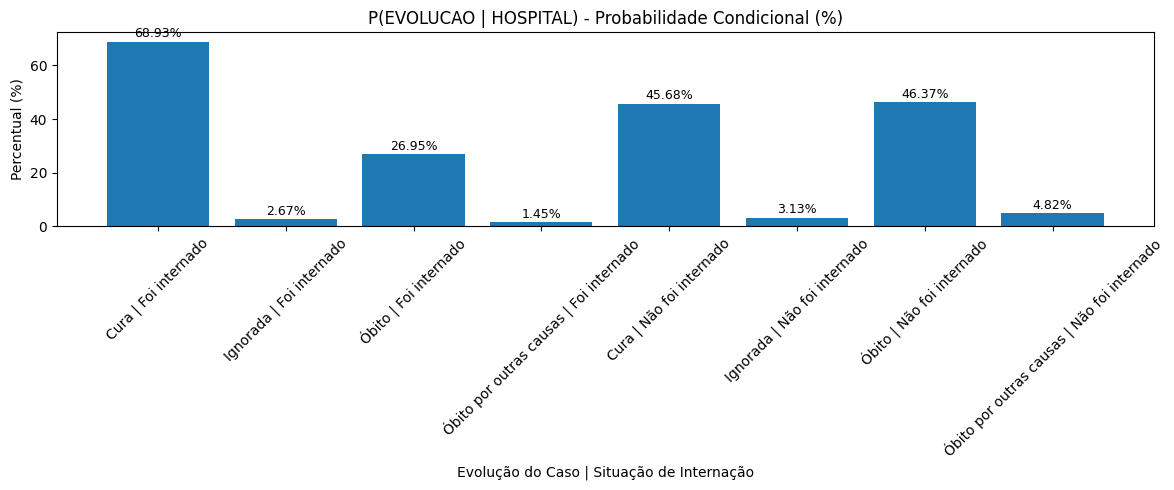

In [18]:
## Com esses dois últimos cálculos, podemos encontrar todas as probabilidades de A (HOSPITAL), tal que B (EVOLUCAO)
prob_evolucao_tal_que_hospital = pd.merge(prob_hospital_e_evolucao.reset_index(), prob_hospital.reset_index(), on='HOSPITAL_DESC')
prob_evolucao_tal_que_hospital['P(EVOLUCAO | HOSPITAL)'] = (
    prob_evolucao_tal_que_hospital['P(HOSPITAL ∩ EVOLUCAO)'] / prob_evolucao_tal_que_hospital['P(HOSPITAL)']
)
prob_evolucao_tal_que_hospital['P(EVOLUCAO | HOSPITAL)'] = (prob_evolucao_tal_que_hospital['P(EVOLUCAO | HOSPITAL)'] * 100).round(2).astype(str) + '%'
# Preparar os dados numéricos (sem % string)
prob_evolucao_tal_que_hospital['P_NUM'] = pd.to_numeric(
    prob_evolucao_tal_que_hospital['P(EVOLUCAO | HOSPITAL)'].str.replace('%', '')
)


# Criar categorias compostas para o eixo X
x_labels = [
    f'{hosp} | {evol}'
    for hosp, evol in zip(prob_evolucao_tal_que_hospital['EVOLUCAO_DESC'], prob_evolucao_tal_que_hospital['HOSPITAL_DESC'])
]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(x_labels, prob_evolucao_tal_que_hospital['P_NUM'])

# Título e eixos
ax.set_title('P(EVOLUCAO | HOSPITAL) - Probabilidade Condicional (%)')
ax.set_ylabel('Percentual (%)')
ax.set_xlabel('Evolução do Caso | Situação de Internação')
ax.tick_params(axis='x', rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

#### Análise e Conclusão

##### Análise da Pergunta 1: Qual a probabilidade de óbito dado que o paciente foi internado?

- Fórmula: A seguinte formula da probabilidade condicional foi utilizada:
  - P (Óbito | Internado) = P (Óbito ∩ Internado) / P (Internado)

- O resultado obtido com a fórmula utilizando a linguagem de programação Python mostra que, entre os pacientes internados SRAG por influenza, cerca de 27% dos pacientes evoluíram para óbito. Com isso, fica evidenciado que, mesmo com suporte hospitalar, ainda existe um alto risco de morte, o que reflete a gravidade da condição clínica dos casos.

##### Análise da Pergunta 2: Qual a probabilidade de cura dado que o paciente foi internado?

- Fórmula: A seguinte formula da probabilidade condicional foi utilizada:
  - P (Cura | Internado) = P (Cura ∩ Internado) / P (Internado)

- O resultado obtido com a fórmula utilizando a linguagem de programação Python mostra que, entre os pacientes internados SRAG por influenza, cerca de 68% dos pacientes foram curados. Com isso, fica evidenciado que o suporte hospitalar aumenta significativamente as chances de cura, o que reforça o papel crucial da hospitalização no tratamento desse tipo de síndrome.

##### Análise da Pergunta 3: Qual a probabilidade de internação dado que o paciente evoluiu para óbito?

- Fórmula: A seguinte formula da probabilidade condicional foi utilizada:
  - P (Internado | Óbito) = P (Internado ∩ Óbito) / P (Óbito)

- Quase 97% dos pacientes que evoluíram para óbito estavam internados. Esse dado sugere que, na maioria dos casos fatais registrados, o óbito ocorreu em monitoramento clínico. No entanto, essa informação não deve ser generalizada para toda a população, uma vez que o conjunto de dados utilizado é composto de forma majoritária por pacientes hospitalizados. Logo, qualquer probabilidade condicional que utilize a internação como evento condicionante pode apresentar probabilidades elevadas, refletindo a natureza da base de dados.

##### Análise da Pergunta 4: Qual a probabilidade de cura dado que o paciente não foi internado?

- Fórmula: A seguinte formula da probabilidade condicional foi utilizada:
  - P (Cura | Não internado) = P (Cura ∩ Não internado) / P (Não internado)

- Após a realização dos cálculos, podemos observar que cerca de 45% dos pacientes que não foram internados se curaram, ou seja, a chance de cura fora do ambiente hospitalar foi muito menor em comparação aos internados (quase 69%). Essa característica nos permite afirmar que a ausência de internação está associada a maior risco de morte do paciente ou evolução incerta.

##### Conclusão

- Em síntese, os resultados demonstram que a internação hospitalar está associada a maior chance de cura no SRAG por Influenza, mas não elimina o risco de óbito. A análise condicional realizada evidencia que os pacientes internados apresentam uma taxa de mortalidade menor dos que não forma, reforçando a importância da hospitalização precoce para a diminuição da taxa de óbito. No entanto, devido ao viés da própria base de dados, focada apenas em pacientes hospitalizados, é necessário ter cuidado ao generalizar esses dados para a população em geral.

## Teorema de Bayes baseado na coluna "PCR_RESULT" e "RES_AN" e na prevalência de adquirir uma vírus respiratório

- Pergunta a ser respondida: Dado que o teste antigênico deu positivo, qual a probabilidade de o paciente realmente ter alguma infecção respiratória viral confirmada por PCR (Influenza, SARS-CoV-2, VSR etc.)?
  - Em termos estatísticos: P(Doença | Teste Positivo)

#### 1º Etapa: Definição da prevalência

- Para podermos aplicar o Teorema de Bayes em cima das colunas que foram propostas para a análise, será necessário obter a prevalência da infecção respiratória viral na população brasileira. Essa tarefa não pode ser feita utilizando a base dados, uma vez que ela representa somente uma parcela da população e também não está alinhado com o "padrão-ouro" utilizado para calcular a prevalência de algo em uma população. Diante disso, para aplicar o Teorema de Bayes de forma que ele esteja o mais próximo possível da realidade vamos utilizar a coluna PCR_RESUL simular a prevalência, uma vez que ele oferece mais assertividade que os testes antigênico. Por outro lado, a coluna RES_AN será utilizada para calcular a sensibilidade do teste em relação a prevalência quando estiver acompanhado de um teste positivo no molecular. Por fim, será considerado como teste positivo os pacientes que tiveram com RES_AN preenchido.

#### 2º Etapa: Limpeza dos dados

- Seguindo o padrão, para realizar a análise dessas colunas precisamos primeiro entender as colunas que vamos utilizar, nesse caso:
  - RES_AN: Indica o resultado do teste antigênico
  - POS_AN_FLU: Indica se o resultado do teste antigênico foi positivo para influenza:
  - PCR_RESUL: Indica o resultado do teste molecular ou RT-PCR
  - POS_PCRFLU: Indica se o resultado do teste molecular ou RT-PCR foi positivo para influenza


In [24]:
exibir_texto("Possíveis valores da coluna RES_AN")
display(df['RES_AN'].value_counts(dropna=False))

exibir_texto("Possíveis valores da coluna PCR_RESUL")
display(df['PCR_RESUL'].value_counts(dropna=False))

,count
RES_AN,
5.0,43424
4.0,19710
1.0,16674
NaN,15164
2.0,4353
9.0,667
3.0,8


,count
PCR_RESUL,
1.0,45655
2.0,20536
5.0,13315
NaN,11633
4.0,8336
9.0,315
3.0,210


In [49]:
valores_validos_resultado_antigenico = [1, 2, 3, 4, 5, 9]
valores_validos_resultado_pcr = [1, 2, 3, 4, 5, 9]

df_teste_pcr_antigenico_not_null = df[
    (
        df['RES_AN'].notnull() &
        df['PCR_RESUL'].notnull()
    )
]

df_teste_pcr_antigenico_validos = df_teste_pcr_antigenico_not_null[(
    df_teste_pcr_antigenico_not_null['RES_AN'].isin(valores_validos_resultado_antigenico) &
    df_teste_pcr_antigenico_not_null['PCR_RESUL'].isin(valores_validos_resultado_pcr)
)]

#### 3º Etapa: Análise dos dados

- Agora que temos os dados "limpos" nós podemos construir a nossa lógica para aplicar o Teorema de Bayes. A fórmula que precisamos resolver é a seguinte:

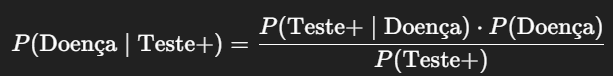

In [50]:
df_teste_pcr_antigenico_total = len(df_teste_pcr_antigenico_validos)

##### 3.1: Probabilidade da prevalência ou P(Doença)

In [51]:
# No PCR_RESUL (1): Detectável
total_doenca = len(df_teste_pcr_antigenico_validos[df_teste_pcr_antigenico_validos['PCR_RESUL'] == 1])
prob_doenca = total_doenca / df_teste_pcr_antigenico_total

print(f"Probabilidade de ter a doença (prevalência observada): {prob_doenca:.2%}")

Probabilidade de ter a doença (prevalência observada): 50.59%


##### 3.2: Probabilidade da sensibilidade ou P(Teste +)

In [52]:
# No RES_AN (1): Positivo
total_teste_positivo = len(df_teste_pcr_antigenico_validos[df_teste_pcr_antigenico_validos['RES_AN'] == 1])
prob_teste_positivo = total_teste_positivo / df_teste_pcr_antigenico_total

print(f"Probabilidade de dar positivo (proporção de positivos no teste): {prob_teste_positivo:.2%}")

Probabilidade de dar positivo (proporção de positivos no teste): 18.09%


##### 3.3: Probabilidade da sensibilidade ou P(Teste + | Doença)

In [62]:
# Utilizando a fórmula P (A | B) = P (A UNIAO B) / P (B)
total_teste_positivo_e_doenca = len(
    df_teste_pcr_antigenico_validos[
            (df_teste_pcr_antigenico_validos['RES_AN'] == 1) &
            (df_teste_pcr_antigenico_validos['PCR_RESUL'] == 1)
    ]
)

prob_teste_positivo_tal_que_doenca = total_teste_positivo_e_doenca / total_doenca

print(f"Probabilidade de o paciente testar positivo dado que ele possui a doença (sensibilidade): {prob_teste_positivo_tal_que_doenca:.2%}")

Probabilidade de o paciente testar positivo dado que ele possui a doença (sensibilidade): 5.13%


##### 3.4 Valor preditivo positivo P(Doença | Teste +)

In [64]:
# Utilizando a fórmula P (A | B) = P (A | B) * P(A) / P (B)
def bayes_theorem(
  p_b_given_a,
  p_a,
  p_b
):
  p_a_given_b = p_b_given_a * p_a / p_b
  return p_a_given_b

prob_doenca_tal_que_teste_positivo = bayes_theorem(prob_teste_positivo_tal_que_doenca, prob_doenca, prob_teste_positivo)

print(f"Probabilidade de o paciente ter a doença dado que deu positivo (valor preditivo): {prob_doenca_tal_que_teste_positivo:.2%}")

Probabilidade de o paciente ter a doença dado que deu positivo (valor preditivo): 14.34%


#### Análise e Conclusão

##### Análise da pergunta: Dado que o teste antigênico deu positivo, qual a probabilidade de o paciente realmente ter alguma infecção respiratória viral confirmada por PCR (Influenza, SARS-CoV-2, VSR etc.)?

- Para responder essa pergunta, foi utilizada a seguinte fórmula:
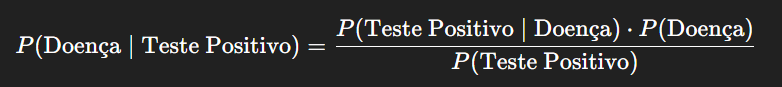

- Com objetivo de alcançar o resultado da fórmula do Teorema de Bayes para esse caso foi necessário calcular algumas probabilidades de forma isolada, utilizando os dados que tínhamos disponíveis:
  - P(Doença): Prevalência observada de infecção viral respiratória confirmada por RT-PCR (coluna PCR_RESUL = 1)
    - Resultado: 50,59%
  - P(Teste Positivo): Proporção de pacientes com resultado positivo no teste antigênico (coluna RES_AN = 1)
    - Resultado: 18,09%
  - P(Teste Positivo | Doença): Sensibilidade do teste antigênico observada na base, ou seja, a proporção de pacientes com infecção viral confirmada por PCR que também testaram positivo no teste antigênico
  - Resultado: A probabilidade de 14.34%

##### Conclusão

- O resultado obtido com a aplicação do Teorema de Bayes mostra que, mesmo quando o teste antigênico é positivo, a probabilidade de a pessoa ter de fato alguma infecção viral respiratória confirmada por PCR é de apenas 14.34%. Isso mostra que o teste antigênico possui um valor preditivo positivo relativamente baixo, mesmo em um contexto onde a prevalência da doença é alta (mais de 50%). Além disso, a baixa sensibilidade observada (~5%) pode estar relacionada com uma limitação técnica do teste rápido em comparação aos moleculares.







